In [1]:
import sys
import os
from pathlib import Path
sys.path.append("..")
from build_features import build_features

import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
comp_prices_df = pd.read_csv("../data/comp_prices.csv")
sales_df = pd.read_csv("../data/sales.csv")

In [7]:
df = build_features(sales_df, comp_prices_df)

In [10]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [40]:
sel_df = df[df.prod_id == "P4"]
X = sel_df[["diff_mean_pct", "qty_day_shift"]]
y = np.log(sel_df[["qty_order"]])
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              qty_order   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     35.38
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.35e-13
Time:                        01:19:33   Log-Likelihood:                -255.13
No. Observations:                 156   AIC:                             516.3
Df Residuals:                     153   BIC:                             525.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9268      0.116     25.209      0.000       2.697       3.156
diff_mean_pct    -4.0097      0.946     -4.238      0.000      -5.879      -2.141
qty_day_shift     0.0035      0.001      6.811      0.000       0.002       0.004
==============================================================================
Omnibus:                        5.886   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.486
Skew:                          -0.441   Prob(JB):                       0.0644
Kurtosis:                       3.258   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

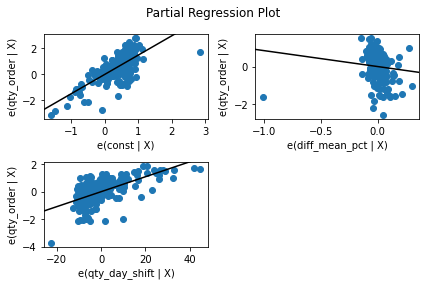

In [38]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)